<a href="https://colab.research.google.com/github/Soumya190/Soumya190/blob/main/STOCK_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

#Reading the data

In [ ]:
df = pd.read_csv("/content/archive(12).zip")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800
...,...,...,...,...,...,...,...
248,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63615400
249,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900
250,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200
251,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800


#Understanding about the data

In [ ]:
df.shape

(253, 7)

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,300.136008,307.486021,292.114058,299.709104,299.709104,8.050938e+07
std,46.139272,46.789896,44.685331,45.788283,45.788283,2.546595e+07
min,207.949997,217.973328,206.856674,209.386673,209.386673,3.504270e+07
25%,266.513336,273.166656,260.723328,266.923340,266.923340,6.255570e+07
50%,298.500000,303.709991,289.130005,296.666656,296.666656,7.695630e+07
75%,335.600006,344.950012,327.510010,336.336670,336.336670,9.347310e+07
max,411.470001,414.496674,405.666656,409.970001,409.970001,1.885563e+08


In [ ]:
df.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
133,2022-04-08,347.736664,349.480011,340.813324,341.829987,341.829987,55013700
119,2022-03-21,304.993347,314.283325,302.363342,307.053345,307.053345,81981600
251,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800
17,2021-10-22,298.500000,303.333344,296.986664,303.226654,303.226654,68642400
13,2021-10-18,283.929993,291.753326,283.823334,290.036682,290.036682,72621600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [ ]:
df.corr()

<ipython-input-7-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.991269,0.986364,0.971783,0.971783,-0.047793
High,0.991269,1.000000,0.988299,0.986715,0.986715,0.008397
Low,0.986364,0.988299,1.000000,0.990137,0.990137,-0.104980
Close,0.971783,0.986715,0.990137,1.000000,1.000000,-0.047791
Adj Close,0.971783,0.986715,0.990137,1.000000,1.000000,-0.047791
Volume,-0.047793,0.008397,-0.104980,-0.047791,-0.047791,1.000000


#Finding the Missing Values

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<Axes: >

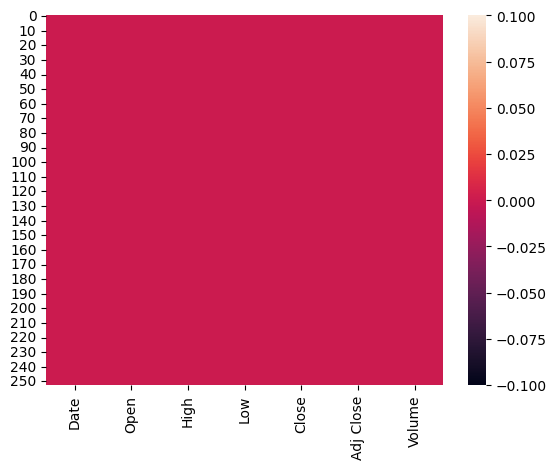

In [ ]:
sns.heatmap(df.isnull())

#Finding the duplicate values

In [ ]:
df.duplicated().sum()

0

#Replacing the value

In [ ]:
df["Date"] = df['Date'].str.replace('-', '/')
df['Date']

0      2021/09/29
1      2021/09/30
2      2021/10/01
3      2021/10/04
4      2021/10/05
          ...    
248    2022/09/23
249    2022/09/26
250    2022/09/27
251    2022/09/28
252    2022/09/29
Name: Date, Length: 253, dtype: object

#Exploratory Data Analysis

<Axes: >

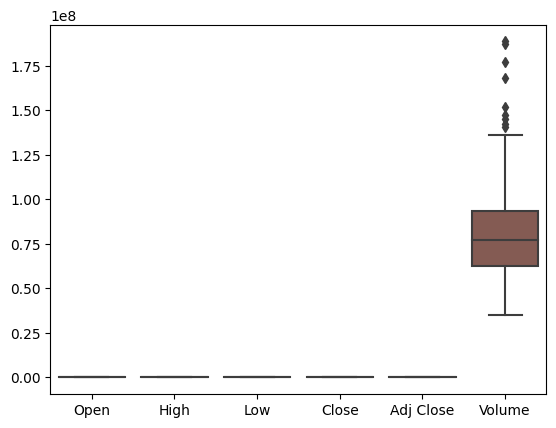

In [ ]:
sns.boxplot(df)

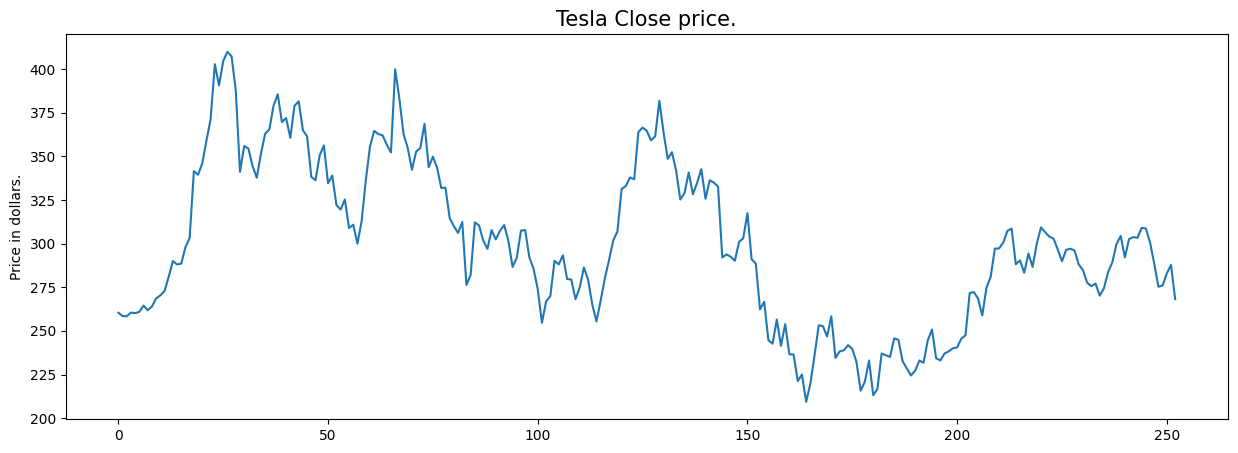

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

<ipython-input-14-77fbfd57c9fe>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
<ipython-input-14-77fbfd57c9fe>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-14-77fbfd57c9fe>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the ne

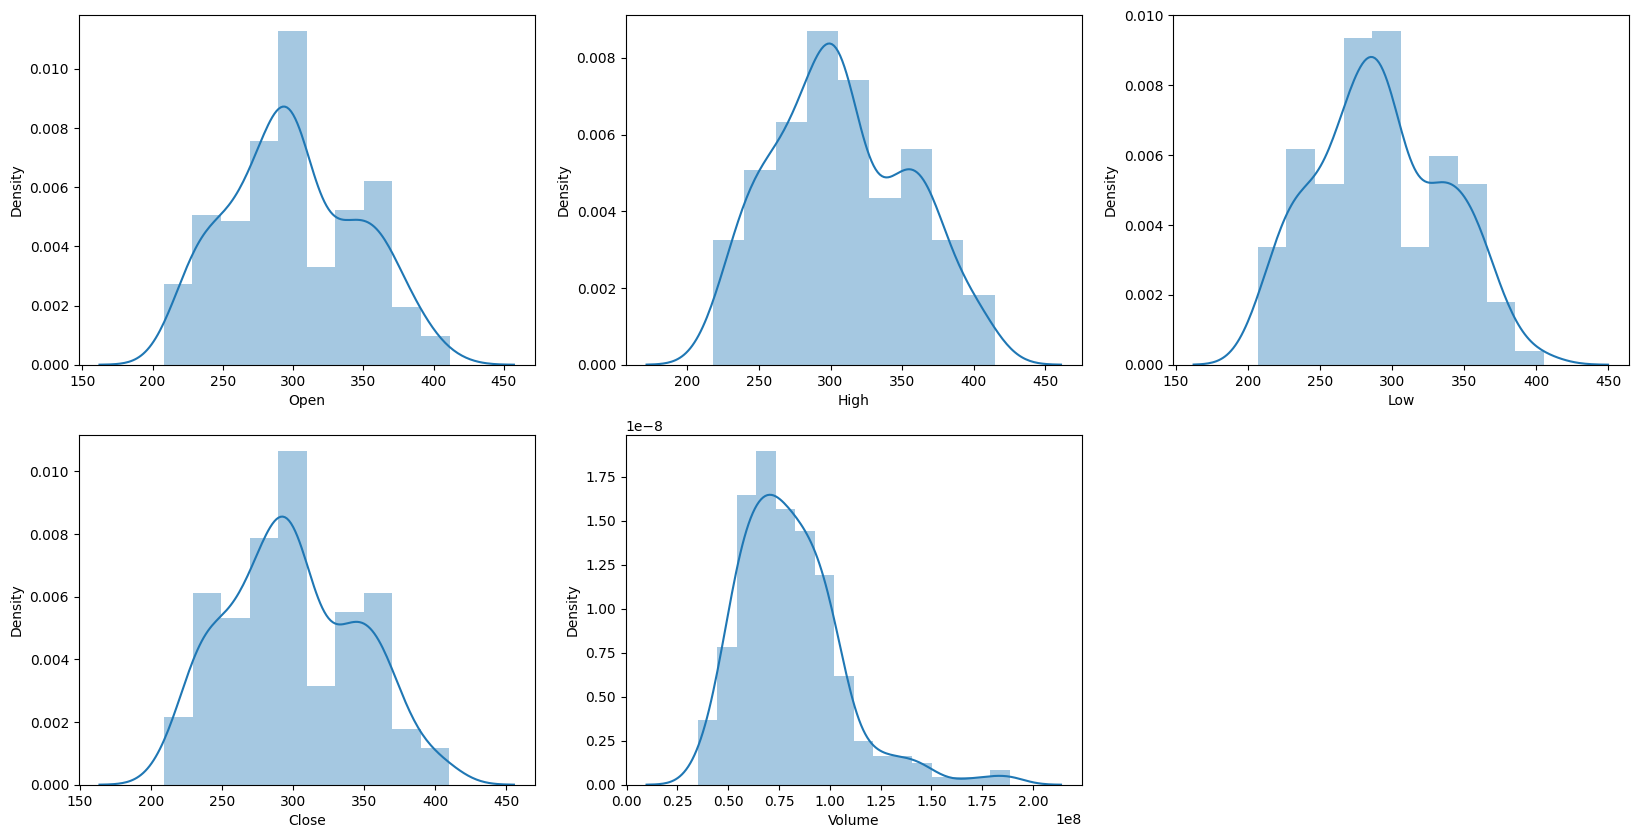

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col])
plt.show()

<ipython-input-15-273e95aba42b>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


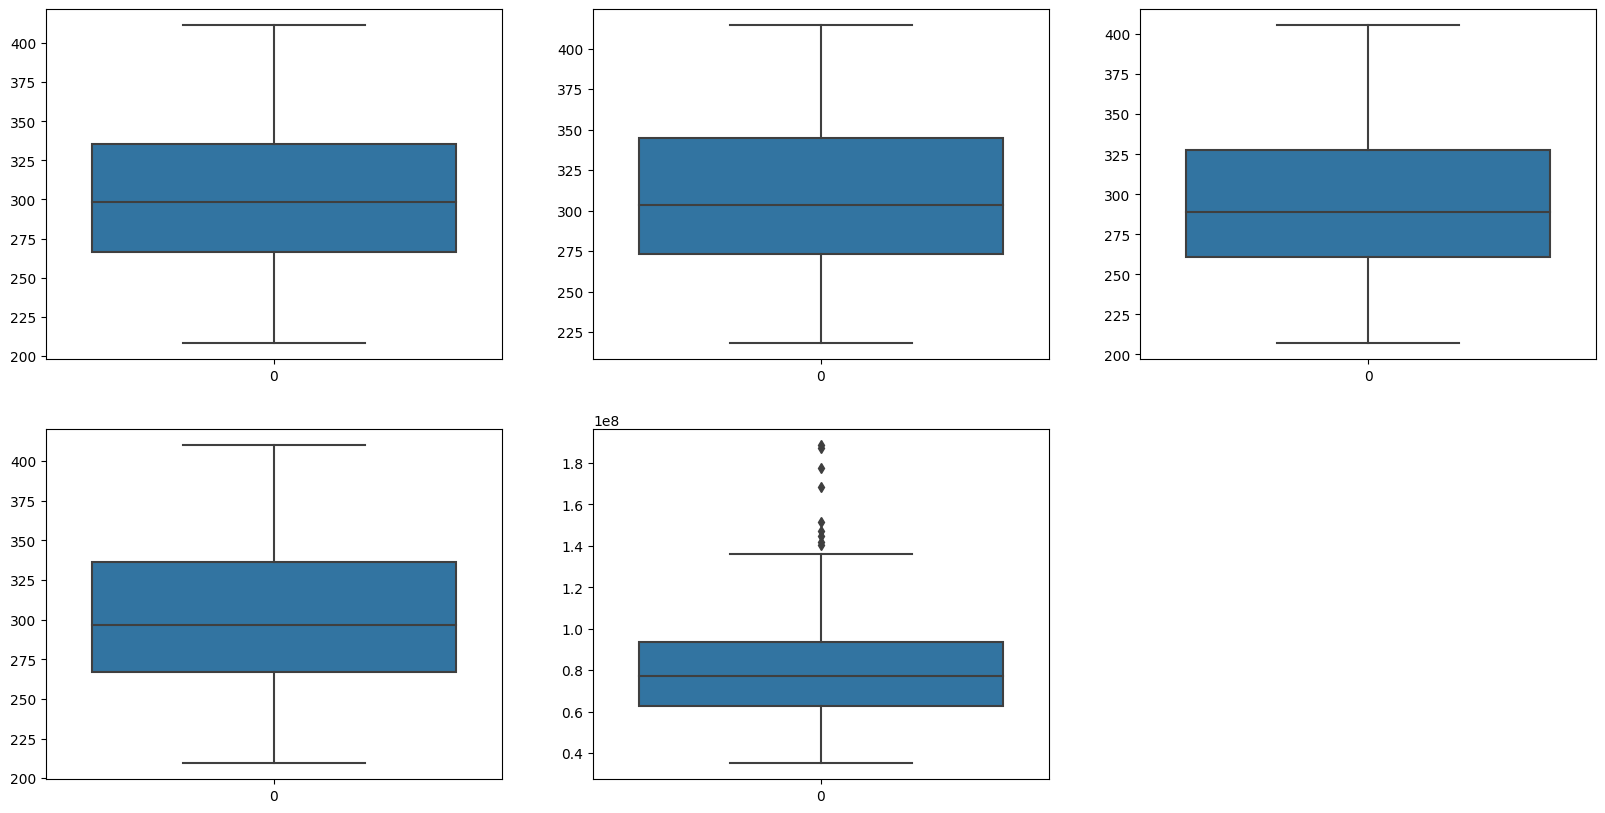

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
plt.show()

#Detection and removal of outlier

Using IQR method for outlier detection and removal

In [ ]:
percentile25 = df['Volume'].quantile(0.25)
percentile75 = df['Volume'].quantile(0.75)
print("25 percentile is :",percentile25)
print("75 percentile is :",percentile75)

25 percentile is : 62555700.0
75 percentile is : 93473100.0


In [ ]:
iqr = percentile75-percentile25
iqr

30917400.0

In [ ]:
upper_bound = percentile25+1.5*iqr
lower_bound = percentile75-1.5*iqr
print("Upper bound is :",upper_bound)
print("lower bound is :",lower_bound)

Upper bound is : 108931800.0
lower bound is : 47097000.0


In [ ]:
df[df['Volume'] > upper_bound]

,Date,Open,High,Low,Close,Adj Close,Volume
18,2021/10/25,316.843323,348.339996,314.733337,341.619995,341.619995,188556300
19,2021/10/26,341.563324,364.980011,333.813324,339.476654,339.476654,187245000
20,2021/10/27,346.553345,356.959991,343.593323,345.953339,345.953339,115579500
23,2021/11/01,381.666656,403.250000,372.886658,402.863342,402.863342,168146100
24,2021/11/02,386.453339,402.863342,382.000000,390.666656,390.666656,128213400
29,2021/11/09,391.200012,391.500000,337.173340,341.166656,341.166656,177317400
30,2021/11/10,336.803345,359.366669,329.103333,355.983337,355.983337,128408100
80,2022/01/24,301.586670,311.170013,283.823334,310.000000,310.000000,151565700
83,2022/01/27,311.119995,311.796661,276.333344,276.366669,276.366669,147109500
84,2022/01/28,277.186676,285.833344,264.003326,282.116669,282.116669,134789100


In [ ]:
new_df = df[(df.Volume< upper_bound) & (df.Volume>lower_bound)]
new_df.shape

(221, 7)

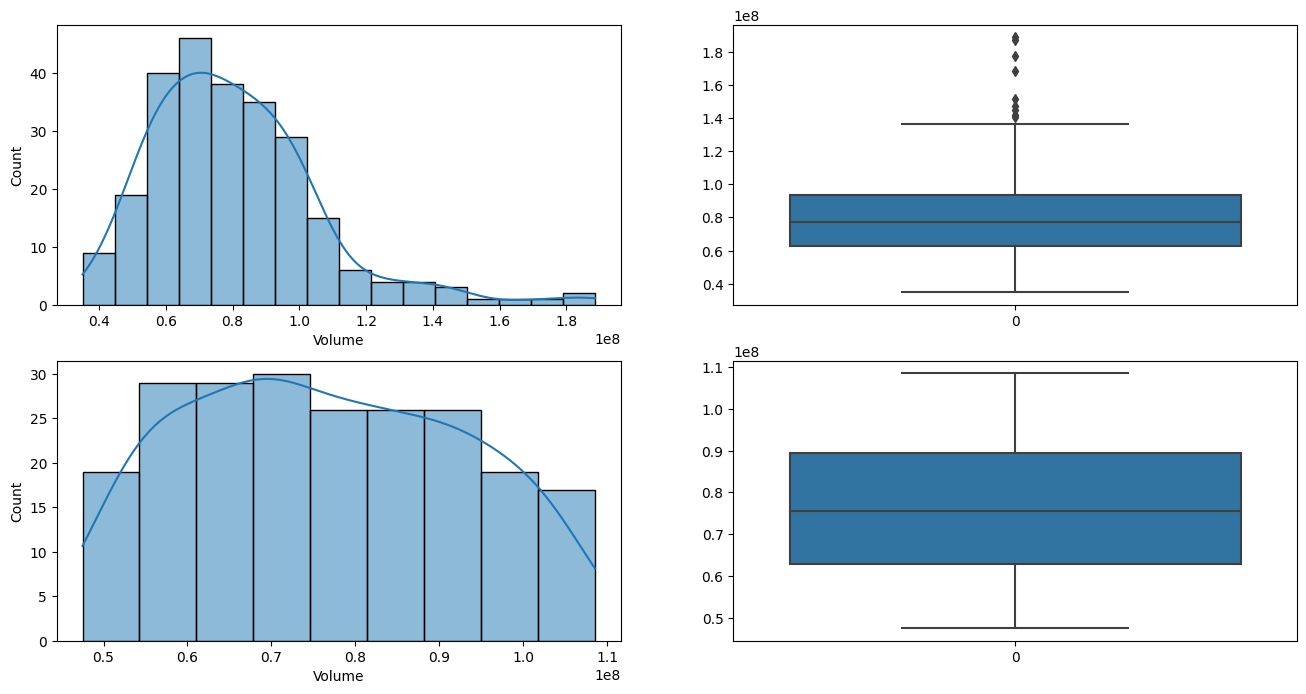

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['Volume'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(df['Volume'])

plt.subplot(2,2,3)
sns.histplot(new_df['Volume'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(new_df['Volume'])

plt.show()

#Modeling the data

In [ ]:
X = df.drop('Close',axis = 1)
y = df['Close']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

#Using standard Scaling

In [ ]:
features = df[['Open', 'High', 'Low']]
target = df['Close']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(227, 3) (26, 3)


In [ ]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()